## Import Dependencies

In [ ]:
#pip install opencv-python

In [89]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import load_model

In [ ]:
#Load training and test data
train = pd.read_csv('/Users/nathan/Desktop/kaggle_sign_mnist/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/Users/nathan/Desktop/kaggle_sign_mnist/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
#concatenate train and test data
data = pd.concat([train, test], ignore_index=True)
data.head()

In [ ]:
data.tail(5)

In [ ]:
#Check how many rows in full dataset
data.shape

In [ ]:
labels = data['label']

plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [ ]:
# Drop training labels from our training data
X = data.drop('label', axis = 1, inplace= True)

In [ ]:
#One hot encode train label
def binarize(df):
    df_labels = df['label']
    label_binarizer = LabelBinarizer()
    df_labels = label_binarizer.fit_transform(df_labels)
    return df_labels

train_labels_encoded = binarize(train)

#Reshape train data
def reshape_data(dataframe):

    dataframe.drop('label', axis=1, inplace=True)

    images = dataframe.values
    images = np.array([np.reshape(i, (28, 28)) for i in images])
    #images = expand_dims(images, axis=-1)

    return images

In [ ]:
images = []
for i in data:
    images.append(np.reshape(i,(28,28)))
images    

In [ ]:
#One hot encode labels
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

labels_encoded

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.3, random_state=42)

In [ ]:
# Scale images
X_train = np.array(X_train) / 225
X_test = np.array(X_test) / 225

In [ ]:
def initialize_model():
    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(24, activation='relu'))

    ### Last layer - Classification Layer with 10 outputs corresponding to 24 letters in dataset
    model.add(layers.Dense(24, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

In [ ]:
#Train our model
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()

es = EarlyStopping(patience = 5)

history = model.fit(X_train, 
                    y_train,
                    validation_split = 0.3,
                    batch_size = 32,
                    epochs = 5,
                    callbacks = [es],
                    verbose = 1)

In [ ]:
model.summary()

In [ ]:
res = model.evaluate(X_test, y_test, verbose = 1 )
print(f'The accuracy on the test set is of {res[1]*100:.2f} %')

In [ ]:
#Save model
model.save('sign_baseline_model')

In [ ]:
classifyer = load_model('sign_baseline_model')

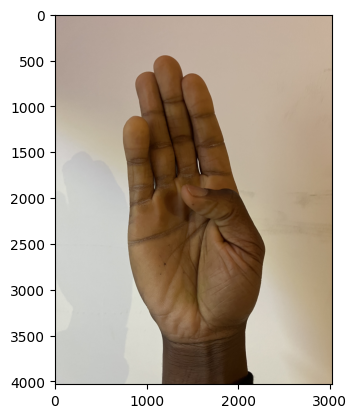

In [86]:
test_img = cv2.imread('/Users/nathan/Desktop/kaggle_sign_mnist/unseen_data_to_predict/IMG_B.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

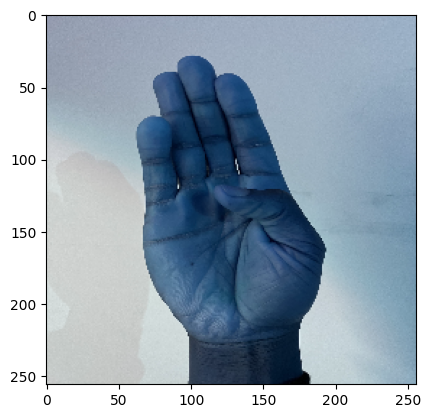

In [95]:
resize = tf.image.resize(test_img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [96]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
from PIL import Image
from skimage import transform

def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (28, 28, 1))
    #np_image = np.expand_dims(np_image, axis=0)
    
    return np_image

In [ ]:
#Match label to corresponding letter
def get_letter(result):
    labels = {0: 'A',
              1: 'B',
              2: 'C',
              3: 'D',
              4: 'E',
              5: 'F',
              6: 'G',
              7: 'H',
              8: 'I',
              9: 'K',
              10: 'L',
              11: 'M',
              12: 'N',
              13: 'O',
              14: 'P',
              15: 'Q',
              16: 'R',
              17: 'S',
              18: 'T',
              19: 'U',
              20: 'V',
              21: 'W',
              22: 'X',
              23: 'Y'}
    res = int(result)
    return labels[res]

In [ ]:
image = load('/Users/nathan/Desktop/kaggle_sign_mnist/unseen_data_to_predict/IMG_B.jpg')

In [ ]:
image.shape

In [ ]:
#show loaded image
plt.imshow(image)
plt.title('input image')
plt.axis = False
plt.show()

In [ ]:
result = str(classifyer.predict(image))

In [ ]:
get_letter(result)

In [ ]:
model.predict(image)

In [ ]:
import cv2

img_array = cv2.imread('/Users/nathan/Desktop/kaggle_sign_mnist/unseen_data_to_predict/IMG_B.HEIC', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap='gray')
plt.show

In [ ]:
#Evaluate performance on unseen data
y_pred = model.predict(test_images)

#Accuracy score on unseen test data
print(f'The accuracy of the model on the unseen test data is {accuracy_score(test_labels, y_pred.round())*100:.2f} %')